# 2. Problem: SVM with non-linear kernels
    For this problem, recall the synthetic dataset generated in the example notebook, using make_circles(100,
    factor=.1, noise=.1, random_state=0).
### a. Design a suitable SVM classifier for this dataset. Justify your parameter choice and kernel used.

### b. Investigate the effect of the amount of training used on the classifier design. For this purpose, you can consider plotting the testing performance as a function of the amount of training used. Comment on your findings.

In [33]:
# Data handling
import pandas as pd
import numpy as np
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Data preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
# Machine learning
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC

# Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

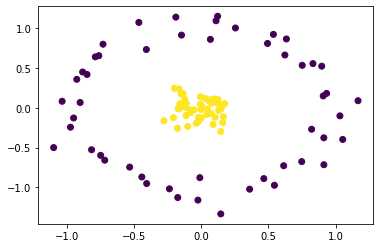

In [34]:
# Load the dataset
X, Y = make_circles(n_samples=100, factor= 0.1, noise=0.1, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis') # c is the color, cmap is the color map

In [35]:
# Split test data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.35, random_state=1)


### Answer to Question 1

In [36]:
clf_svc = SVC(kernel= 'rbf') # rbf is the default kernel
clf_svc.fit(X_train, Y_train) # Train the model
print('Accuracy: ', accuracy_score(Y_test, clf_svc.predict(X_test))) # Test the model

Accuracy:  1.0


In [37]:
# Other metrics to evaluate the model
print('Confusion matrix: \n', confusion_matrix(Y_test, clf_svc.predict(X_test)))
print('Classification report: \n', classification_report(Y_test, clf_svc.predict(X_test)))


Confusion matrix: 
 [[16  0]
 [ 0 19]]
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        19

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35



Using the svm we can see that with 'rbf' the accuracy score is 1.0 which means all predictions on the test data were correct.
* Precision was 1.0
* Recall was 1.0
* F1 score was 1.0

The confusion matrix is showing that there were no misclassified samples in the test data, which confirms the accuracy score.


## Question 2 Effect of Amount of Training

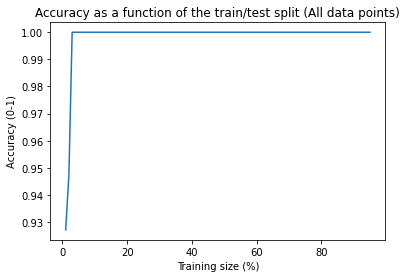

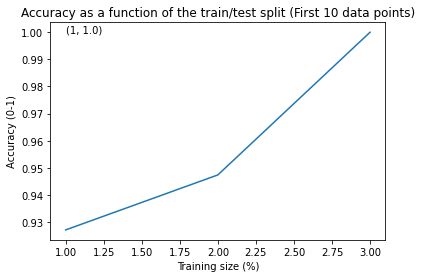

In [48]:
accuracies = []
# Plot accuracy for different percentages of train/test split
for i in range(96, 1, -1):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=i/100, random_state=0)
    clf_svc = SVC(kernel= 'rbf') # rbf is the default kernel
    clf_svc.fit(X_train, Y_train) # Train the model
    accuracies.append(accuracy_score(Y_test, clf_svc.predict(X_test))) # Test the model

# Plot the accuracy as a function of the train/test split
plt.plot(range(1, 96, 1), accuracies)
plt.xlabel('Training size (%)')
plt.ylabel('Accuracy (0-1)')
plt.title('Accuracy as a function of the train/test split (All data points)')
plt.show()

# Now plot from 1 to 4

plt.plot(range(1, 4, 1), accuracies[:3])
plt.xlabel('Training size (%)')
plt.ylabel('Accuracy (0-1)')
plt.title('Accuracy as a function of the train/test split (First 10 data points)')
plt.show()


Accuracy climbs to 1.0 at 3% which makes this the optimal amount of samples in order to avoid encountering diminishing returns/overfitting risk.